# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff, Nicolas Caro y Felipe Tobar  

**Fecha:** 03 enero, 2020

# Módulo 10 - Discubrir estructura en datos usando teoría de grafos
Instalar con `conda install pomegranate`.

In [36]:
import numpy as np
import pandas as pd
from pomegranate import *

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [26]:
df0 = pd.read_csv('../modulo8/clientes.csv', low_memory=False, usecols=[
    'CLASE', 'edad', 'DDVI', 'DM', 'DDVE', 'DDVI1', 'DM1', 'DDVE1', 'DDVI2', 'DM2', 'DDVE2', 'DDVI3', 'DM3', 'DDVE3', 'PTJE_SICNEW',
])
df0 = df0.dropna()
df0.head(100)

,edad,DDVI,DM,DDVE,DDVI1,DM1,DDVE1,DDVI2,DM2,DDVE2,DDVI3,DM3,DDVE3,CLASE,PTJE_SICNEW
0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,958.219614
1,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,984.900069
2,80.0,357.0,0.0,0.0,266.0,0.0,0.0,210.0,0.0,0.0,258.0,0.0,0.0,0,996.599478
4,74.0,102.0,0.0,0.0,105.0,0.0,0.0,100.0,0.0,0.0,90.0,0.0,0.0,0,994.937855
5,75.0,1819.0,0.0,0.0,1784.0,0.0,0.0,1807.0,0.0,0.0,1758.0,0.0,0.0,0,985.998081
7,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,958.219614
8,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,984.900069
9,67.0,1346.0,0.0,0.0,1347.0,0.0,0.0,1322.0,0.0,0.0,1309.0,0.0,0.0,0,978.904617
13,69.0,1442.0,0.0,0.0,1485.0,0.0,0.0,1531.0,0.0,0.0,1570.0,0.0,0.0,0,991.259682
14,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,958.219614


In [30]:
df = df0[:100]

X = df.loc[:, df.columns != 'CLASE']
y = df['CLASE']

model = BayesianNetwork.from_samples(X, algorithm='exact')

for i, name in enumerate(X.columns):
    print('%d: %s' % (i, name))

0: edad
1: DDVI
2: DM
3: DDVE
4: DDVI1
5: DM1
6: DDVE1
7: DDVI2
8: DM2
9: DDVE2
10: DDVI3
11: DM3
12: DDVE3
13: PTJE_SICNEW


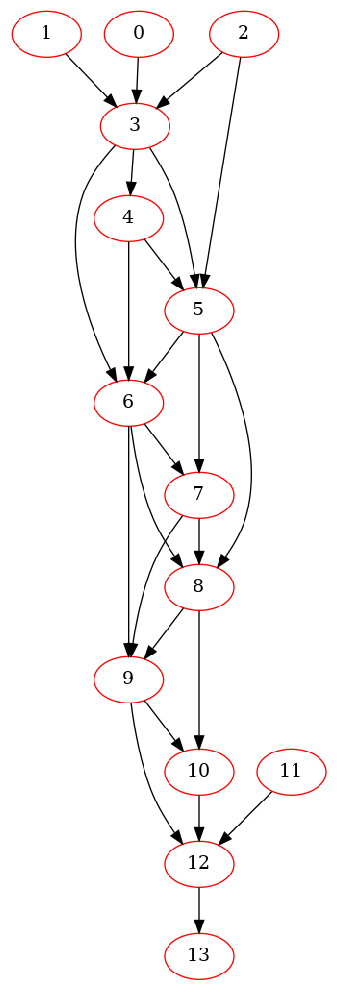

In [40]:
plt.rcParams["figure.figsize"] = (12,18)
model.plot()